# Predictive Modeling and Customer Segmentation: 

# A Strategic Approach for iFood’s Marketing Campaigns

# 1 - Preface

Kelompok 1

Nama : Ronan Lazuardi, Muhammad Fariz Firdaus, Syahrul Budi Rahmadan

Batch : FTDS-SBY-002

Objective : Meningkatkan jumlah customer yang menerima kampanye promo

URL Dataset : Customer Personality Analysis, [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data)

Background :

*Indonesia*

Di tengah pasar pengiriman makanan yang sangat kompetitif, memahami perilaku pelanggan sangat penting untuk keberhasilan kampanye pemasaran. Proyek yang kami lakukan bertujuan untuk memanfaatkan teknik-teknik data science guna mengoptimalkan strategi pemasaran sebuah perusahaan bernama iFood. Kami akan mengembangkan model klasifikasi untuk memprediksi perilaku pembelian pelanggan dalam kampanye iFood berikutnya, dan model clustering untuk mempersonalisasi pengalaman pelanggan. Dengan berfokus pada kelompok-kelompok pelanggan tertentu, iFood dapat memaksimalkan keuntungan yang dapat mereka peroleh dalam kampanye-kampanye mendatang.

*English*

In a very competitive food delivery market, understanding customer behavior is important for the success of marketing campaigns. This project aims to implement data science techniques to optimize iFood’s marketing strategies. We will develop a classification model to predict customer purchasing behavior in upcoming campaigns, and a clustering model to personalize the customers. By focusing on specific customer clusters, we can maximize iFood’s profit in future campaigns.

# 2 - Import Libraries

In [2]:
import pandas as pd 
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

# 3 - Data Loading

In [3]:
# Loading file csv dataset

df = pd.read_csv("data_clustered.csv", index_col=False)

Deskripsi tiap kolom/feature
|Feature|Description|
|:-|:-|
|AcceptedCmp1|1 if customer accepted the offer in the 1st campaign, 0 otherwise|
|AcceptedCmp2|1 if customer accepted the offer in the 2nd campaign, 0 otherwise|
|AcceptedCmp3|1 if customer accepted the offer in the 3rd campaign, 0 otherwise|
|AcceptedCmp4|1 if customer accepted the offer in the 4th campaign, 0 otherwise|
|Response (target)|1 if customer accepted the offer in the last campaign, 0 otherwise|
|Complain|1 if customer complained in the last 2 years|
|DtCustomer|Date of customer's enrollment with the company|
|Education|Customer's level of education|
|Marital|Customer's marital status|
|Kidhome|Number of small children in customer's household|
|Teenhome|Number of teenagers in customer's household|
|Income|Customer's yearly household income|
|MntFishProducts|Amount spent on fish products in the last 2 years|
|MntMeatProducts|Amount spent on meat products in the last 2 years|
|MntFruits|Amount spent on fruits in the last 2 years|
|MntSweetProducts|Amount spent on weet products in the last 2 years|
|MntWines|Amount spent on wines in the last 2 years|
|MntGoldProds|Amount spent on gold products in the last 2 years|
|NumDealsPurchases|Number of purchases made with discount|
|NumCatalogPurchases|Number of purchases using catalogue
|NumStorePurchases|Number of purchases made directly in store|
|NumWebPurchases|Number of purchases made through company's web site|
|NumWebVisitsMonth|Number of visits to company's web site in the last month|
|Recency|Number of days since the last purchase|

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
# Menampilkan 5 baris awal
df.head(5)

,year_birth,education,marital_status,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,total_mnt,generation,customer_since,Cluster_Labels
0,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,27,Baby Boomers,299,0
1,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,776,Generation X,498,1
2,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,53,Millennials,325,0
3,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,422,Millennials,347,1
4,1967,Master,Together,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,716,Generation X,479,1


In [6]:
# Menampilkan 5 baris acak
df.sample(5)

,year_birth,education,marital_status,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,total_mnt,generation,customer_since,Cluster_Labels
1038,1955,Master,Married,38452.0,1,1,62,56,0,14,0,0,2,3,3,0,3,7,0,0,0,0,0,0,72,Baby Boomers,277,0
1051,1962,Graduation,Single,76624.0,0,1,68,411,106,147,54,115,66,1,5,10,7,1,1,0,0,0,0,0,899,Baby Boomers,222,2
950,1985,Basic,Single,16581.0,0,0,51,1,3,4,2,3,11,1,0,0,3,4,0,0,0,0,0,0,24,Millennials,719,0
839,1989,Graduation,Single,64449.0,1,0,70,218,63,282,137,35,70,4,5,3,12,4,0,0,0,0,0,0,805,Millennials,317,2
1418,1971,Graduation,Single,58350.0,0,1,5,493,26,206,116,80,80,4,8,3,12,6,0,0,0,0,0,0,1001,Generation X,727,1


In [7]:
# Menampilkan 5 baris akhir
df.tail(5)

,year_birth,education,marital_status,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,total_mnt,generation,customer_since,Cluster_Labels
1867,1974,Graduation,Married,34421.0,1,0,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,30,Generation X,549,0
1868,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,1341,Generation X,567,1
1869,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,444,Baby Boomers,205,1
1870,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,1241,Millennials,341,2
1871,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,843,Baby Boomers,342,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year_birth             1872 non-null   int64  
 1   education              1872 non-null   object 
 2   marital_status         1872 non-null   object 
 3   income                 1872 non-null   float64
 4   kidhome                1872 non-null   int64  
 5   teenhome               1872 non-null   int64  
 6   recency                1872 non-null   int64  
 7   mnt_wines              1872 non-null   int64  
 8   mnt_fruits             1872 non-null   int64  
 9   mnt_meat_products      1872 non-null   int64  
 10  mnt_fish_products      1872 non-null   int64  
 11  mnt_sweet_products     1872 non-null   int64  
 12  mnt_gold_prods         1872 non-null   int64  
 13  num_deals_purchases    1872 non-null   int64  
 14  num_web_purchases      1872 non-null   int64  
 15  num_

In [9]:
df.shape

(1872, 28)

Dataset 'data_clustered.csv' terdiri dari 1872 baris dan 28 kolom.

In [10]:
for col in df.columns:
    print('Nilai unik', col, df[col].nunique())

Nilai unik year_birth 56
Nilai unik education 5
Nilai unik marital_status 8
Nilai unik income 1682
Nilai unik kidhome 3
Nilai unik teenhome 3
Nilai unik recency 100
Nilai unik mnt_wines 684
Nilai unik mnt_fruits 153
Nilai unik mnt_meat_products 469
Nilai unik mnt_fish_products 178
Nilai unik mnt_sweet_products 167
Nilai unik mnt_gold_prods 197
Nilai unik num_deals_purchases 15
Nilai unik num_web_purchases 15
Nilai unik num_catalog_purchases 13
Nilai unik num_store_purchases 14
Nilai unik num_web_visits_month 16
Nilai unik accepted_cmp3 2
Nilai unik accepted_cmp4 2
Nilai unik accepted_cmp5 2
Nilai unik accepted_cmp1 2
Nilai unik accepted_cmp2 2
Nilai unik complain 2
Nilai unik total_mnt 898
Nilai unik generation 4
Nilai unik customer_since 641
Nilai unik Cluster_Labels 3


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_birth,1872.0,1968.799145,11.591213,1940.0,1959.00,1970.0,1977.00,1996.0
income,1872.0,50094.496261,19861.274944,1730.0,34379.25,50008.0,65876.50,113734.0
kidhome,1872.0,0.459936,0.543655,0.0,0.00,0.0,1.00,2.0
teenhome,1872.0,0.542201,0.545457,0.0,0.00,1.0,1.00,2.0
recency,1872.0,51.454060,28.480192,0.0,27.00,52.0,76.00,99.0
mnt_wines,1872.0,271.219017,305.949986,0.0,22.00,154.5,446.25,1493.0
mnt_fruits,1872.0,24.350962,38.242723,0.0,1.00,7.0,29.00,199.0
mnt_meat_products,1872.0,142.462073,194.381835,0.0,14.00,57.0,193.25,1725.0
mnt_fish_products,1872.0,35.273504,53.156355,0.0,2.00,11.0,44.25,259.0
mnt_sweet_products,1872.0,25.128205,39.854742,0.0,1.00,7.0,30.00,262.0


# 4 - Exploration Data Analysis

## 4.1 - `Response` (Kolom target)

In [12]:
target = df['Cluster_Labels'].value_counts().reset_index()
persen = df['Cluster_Labels'].value_counts(normalize=True).reset_index()
target["percentage"] = persen["proportion"]
target

,Cluster_Labels,count,percentage
0,0,935,0.499466
1,1,523,0.279380
2,2,414,0.221154


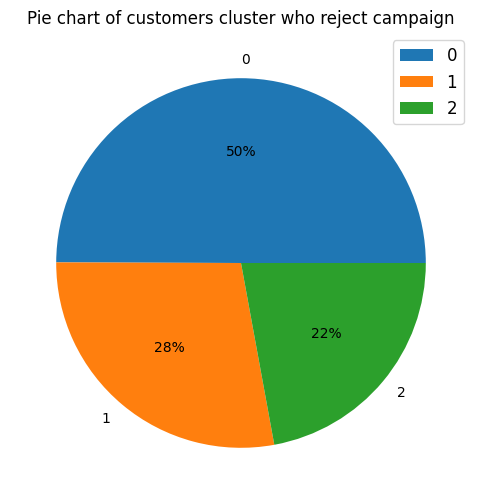

In [13]:
plt.figure(figsize=(6,6))

plt.pie(target["percentage"], labels = ['0','1','2'], autopct='%.0f%%')
plt.title("Pie chart of customers cluster who reject campaign")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

Berdasarkan plot di atas, dapat ditarik kesimpulan bahwa mayoritas dari kelompok customer yang menolak campaign adalah kelompok customer 0 dengan 50%, kelompok 1 28%, dan kelompok 2 22%. Untuk dapat meningkatkan tingkat kesuksesan campaign, maka kami harus mencari perbedaan di antara tiga kelompok ini, lalu brainstorming untuk mencari tahu jenis campaign apa yang cocok untuk mereka.


## 4.2 - Kolom Numerik

### 4.2.1 - Kolom `Year_Birth`

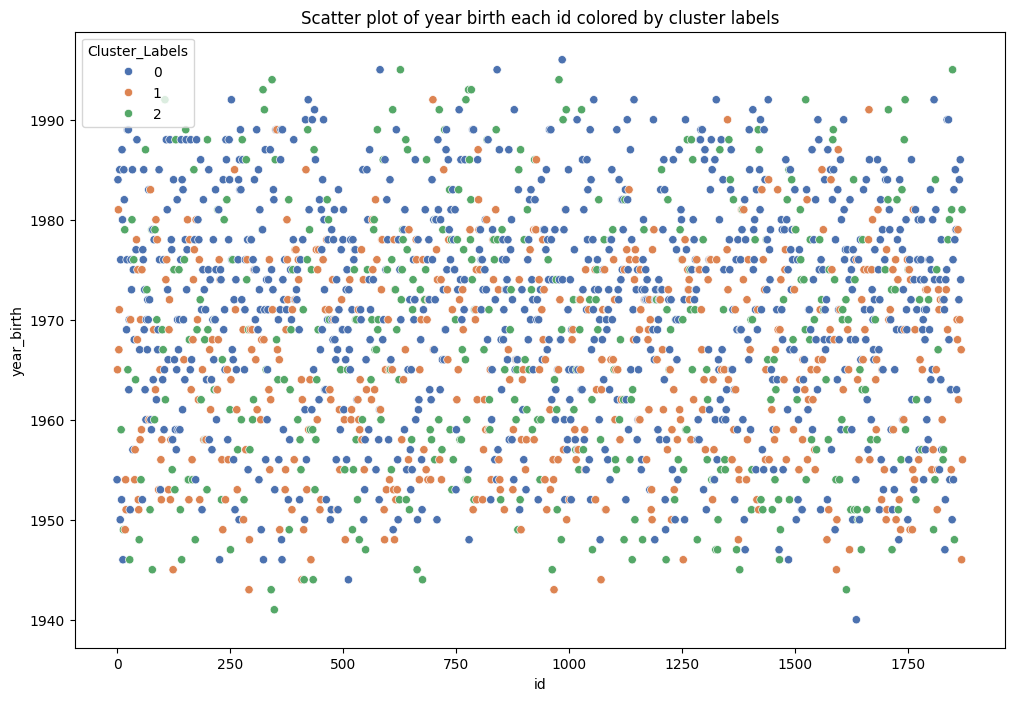

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.index,y=df['year_birth'],hue=df['Cluster_Labels'],palette='deep')
plt.title('Scatter plot of year birth each id colored by cluster labels')
plt.xlabel('id')
plt.show()

Dari scatterplot di atas tidak dapat ditarik kesimpulan mengenai perbedaan kelompok dengan melihat kolom `year_birth`.

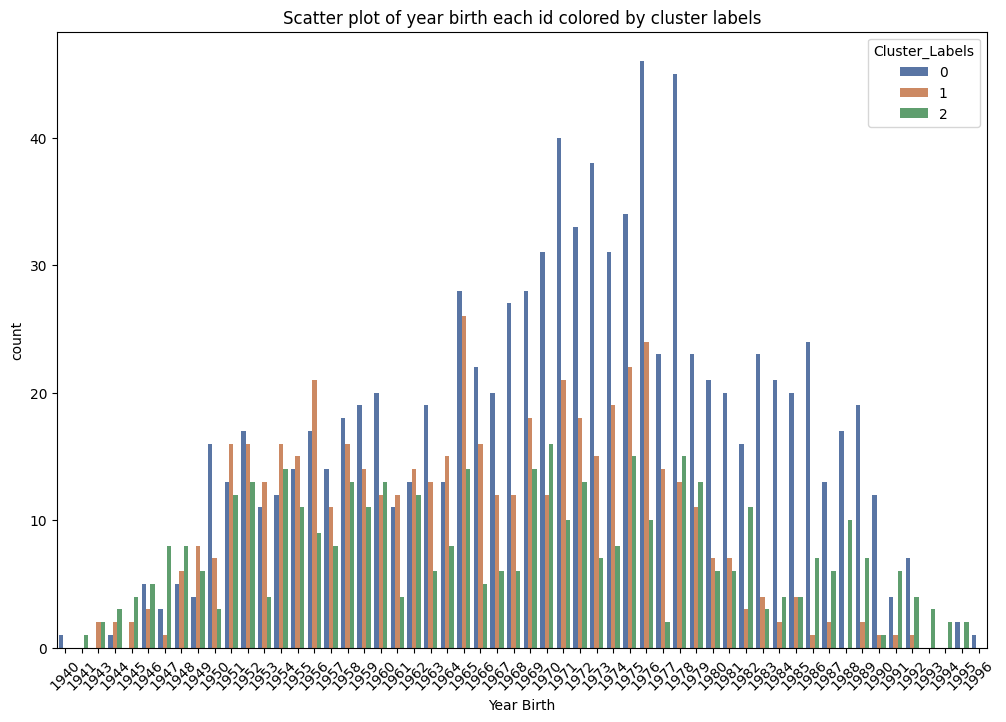

In [15]:
plt.figure(figsize=(12,8))
sns.set_palette("colorblind")
sns.countplot(x=df['year_birth'],hue=df['Cluster_Labels'],palette='deep')
plt.title('Scatter plot of year birth each id colored by cluster labels')
plt.xlabel('Year Birth')
plt.xticks(rotation=45)
plt.show()

Ditemukan pattern sebagai berikut:
1. Cluster 0 memiliki volume data lebih besar, sehingga grafik lebih tinggi dibandingkan kelompok lainnya. Berdasarkan rata-rata customer cluster 0 berada pada kelompok termuda dengan rata-rata tahun kelahiran 1971.
2. Cluster 1 memiliki rata-rata tahun kelahiran paling sedikit yaitu 1965, artinya adalah cluster 1 merupakan kelompok tertua.
3. Cluster 2 memiliki rata-rata 1967, tidak jauh berbeda dengan kelompok cluster 1.
4. Perbedaan tahun kelahiran dan usia customer tidak berbeda signifikan, Jika diambil selisih dari kelompok cluster 0 dan cluster 1 makan diperoleh hanya berbeda 6 tahun.

### 4.2.2 - Kolom `Income`

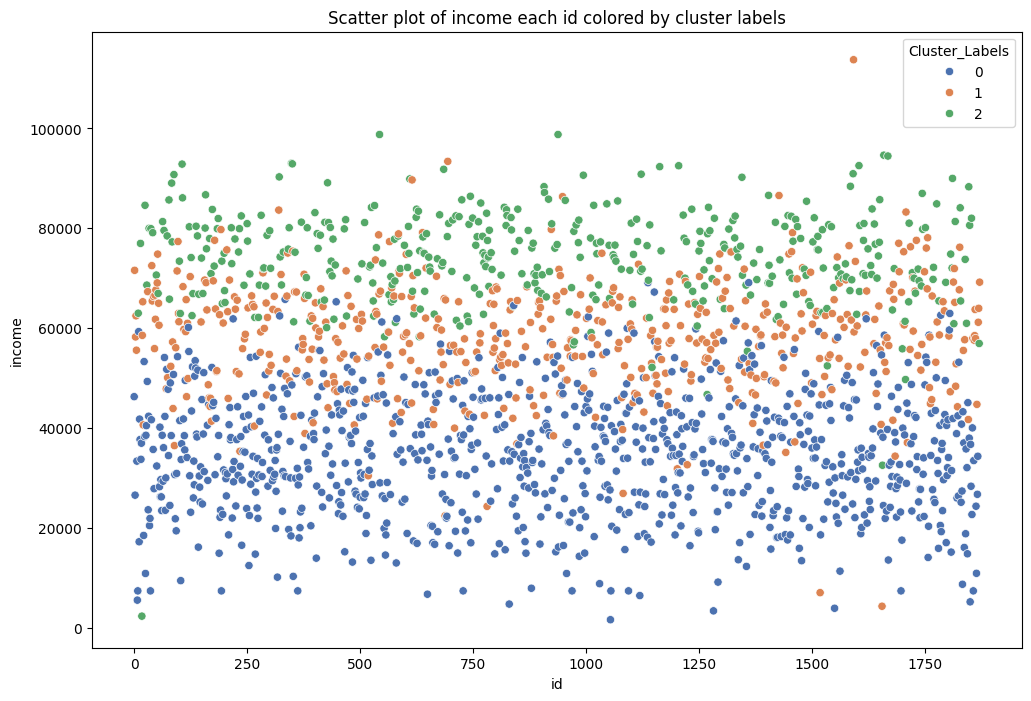

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.index,y=df['income'],hue=df['Cluster_Labels'],palette='deep')
plt.title('Scatter plot of income each id colored by cluster labels')
plt.xlabel('id')
plt.show()

Ditemukan perbedaan signifikan dari kelompok cluster 0, 1, dan 2. Berdasarkan income dapat dikategorikan sebagai berikut:
1. Cluster 0 merupakan kelompok income rendah dengan income di bawah $50,000
2. Cluster 1 merupakan kelompok income menengah dengan rentang $40,000 - $65,000
3. Cluster 2 merupakan kelompok income tinggi dengan income di atas $60,000

### 4.2.3 - Kolom `Recency`

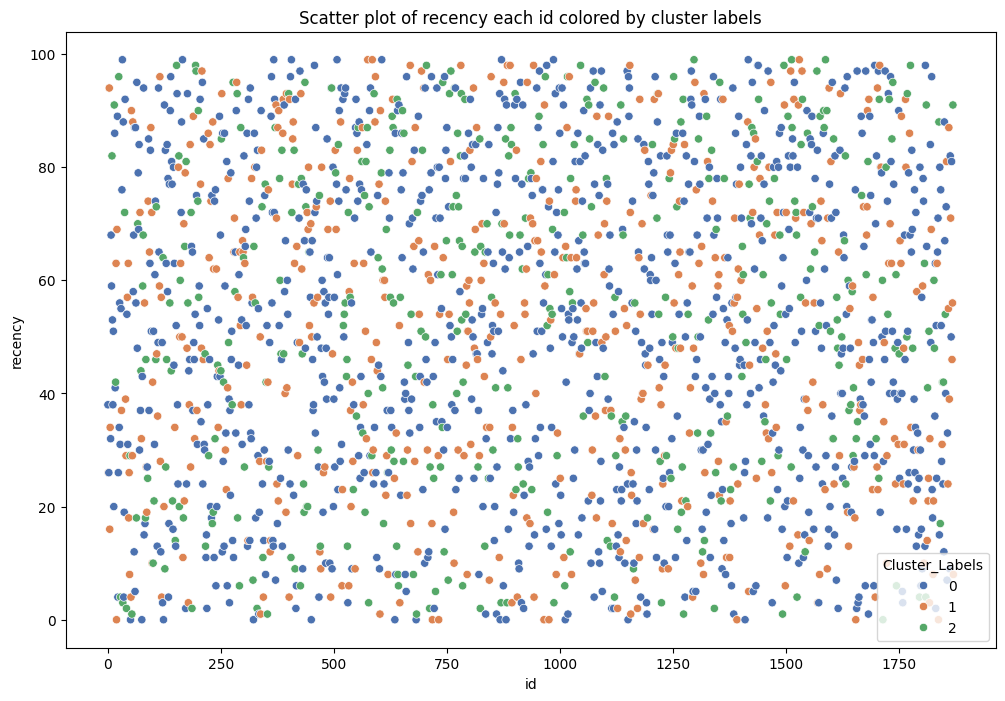

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.index,y=df['recency'],hue=df['Cluster_Labels'],palette='deep')
plt.title('Scatter plot of recency each id colored by cluster labels')
plt.xlabel('id')
plt.show()

Recency terbagi rata dalam masing-masing cluster. Artinya recency tidak mempengaruhi customer dalam decision making saat hendak menerima/menolak campaign.

### 4.2.4 - Kolom `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`

In [23]:
avg_spending = df[['mnt_fish_products', 'mnt_fruits', 'mnt_meat_products', 'mnt_wines', 'mnt_sweet_products', 'mnt_gold_prods']].mean()
spending_columns = ['mnt_fish_products', 'mnt_fruits', 'mnt_meat_products', 'mnt_wines', 'mnt_sweet_products', 'mnt_gold_prods']

<Figure size 1200x600 with 0 Axes>

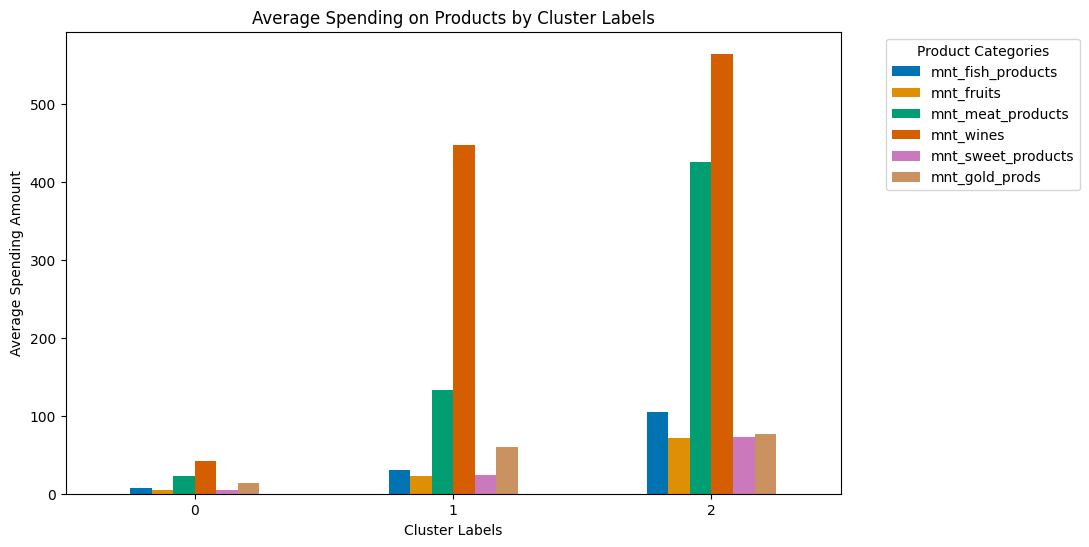

In [26]:
# Calculate cumulative spending for each education
mean_spending_clusterlabels = df.groupby('Cluster_Labels')[spending_columns].mean()

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot
fig, ax = plt.subplots(figsize=(10, 6))
mean_spending_clusterlabels[spending_columns].plot(kind='bar', ax=ax)

plt.title('Average Spending on Products by Cluster Labels')
plt.xlabel('Cluster Labels')
plt.xticks(rotation=0)
plt.ylabel('Average Spending Amount')
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Show the plot
plt.show()

Dari plot di atas dapat ditarik kesimpulan sebagai berikut
1. Cluster 0 memiliki karakteristik spending power yang rendah dibandingkan dengan kelompok cluster lain, produk favoritnya ialah wine, meat, dan gold.
2. Cluster 1 memiliki spending power yang cukup namun tidak sebesar cluster 2, produk favoritnya ialah wine, meat, dan gold.
3. Cluster 2 memiliki spending power yang paling besar, kategori produk favoritnya ialah wine, meat, dan fish.


### 4.2.5 - Kolom `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth`

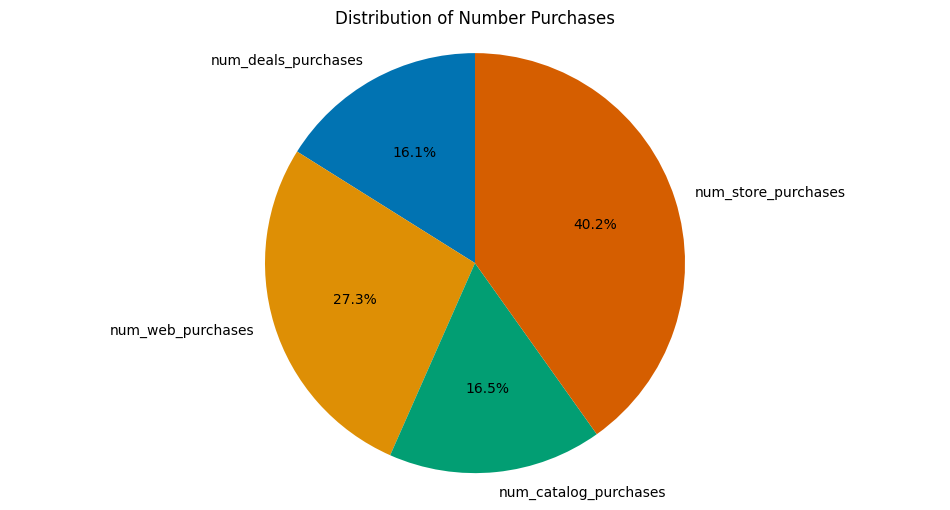

In [27]:
total_num_purchases = df[['num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases']].sum()

# Create a pie chart
plt.figure(figsize=(12, 6))
plt.pie(total_num_purchases, labels=total_num_purchases.index, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal, ensuring that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Distribution of Number Purchases')

# Show the pie chart
plt.show()

In [28]:
print('Number of purchases in the last 2 years = \n')
print(total_num_purchases)
print('\nTotal number of purchases in the last 2 years = ',total_num_purchases.sum())

Number of purchases in the last 2 years = 

num_deals_purchases       4333
num_web_purchases         7353
num_catalog_purchases     4434
num_store_purchases      10816
dtype: int64

Total number of purchases in the last 2 years =  26936


<Figure size 1200x600 with 0 Axes>

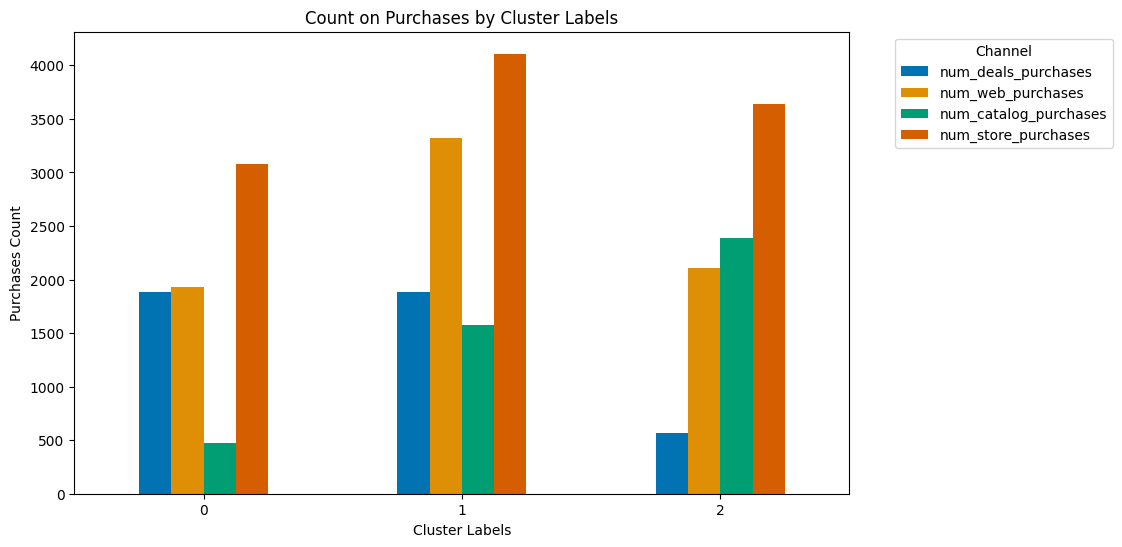

In [31]:
num_purchases_col = ['num_deals_purchases','num_web_purchases','num_catalog_purchases','num_store_purchases']
# Calculate cumulative spending for each education
num_purchases_clusterlabels = df.groupby('Cluster_Labels')[num_purchases_col].sum()

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot
fig, ax = plt.subplots(figsize=(10, 6))
num_purchases_clusterlabels[num_purchases_col].plot(kind='bar', ax=ax)

plt.title('Count on Purchases by Cluster Labels')
plt.xlabel('Cluster Labels')
plt.xticks(rotation=0)
plt.ylabel('Purchases Count')
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Show the plot
plt.show()

Berdasarkan bar plot di atas dapat ditarik kesimpulan:
1. Setiap cluster kurang lebih memiliki jumlah pembelian yang sama, tetapi berdasarkan grafik sebelumnya menunjukkan adanya perbedaan average spending tiap kelompok customer.
2. Dari ketiga kelompok, channel pembelian terfavorit ialah melalui pembelian langsung ke store. Selain itu ada perbedaan signifikan pada kelompok.
3. Perbedaan cluster 0 ialah memiliki jumlah pembelian melalui catalog yang rendah dibanding kelompok lain, sedangkan perbedaan cluster 1 ialah memiliki jumlah pembelian melalui web yang tertinggi dibanding kelompok lain, sedangkan kelompok cluster 2 memiliki perbedaan signifikan pada jumlah transaksi terdiskon mereka yang rendah.

## 4.3 - Kolom Kategorik

### 4.3.1 - Kolom `Education`

In [35]:
target_ed = df["education"].value_counts().reset_index()
persen_ed = df["education"].value_counts(normalize=True).reset_index()
target_ed["percentage"] = persen_ed["proportion"]
target_ed

,education,count,percentage
0,Graduation,961,0.513355
1,PhD,375,0.200321
2,Master,308,0.164530
3,2n Cycle,176,0.094017
4,Basic,52,0.027778


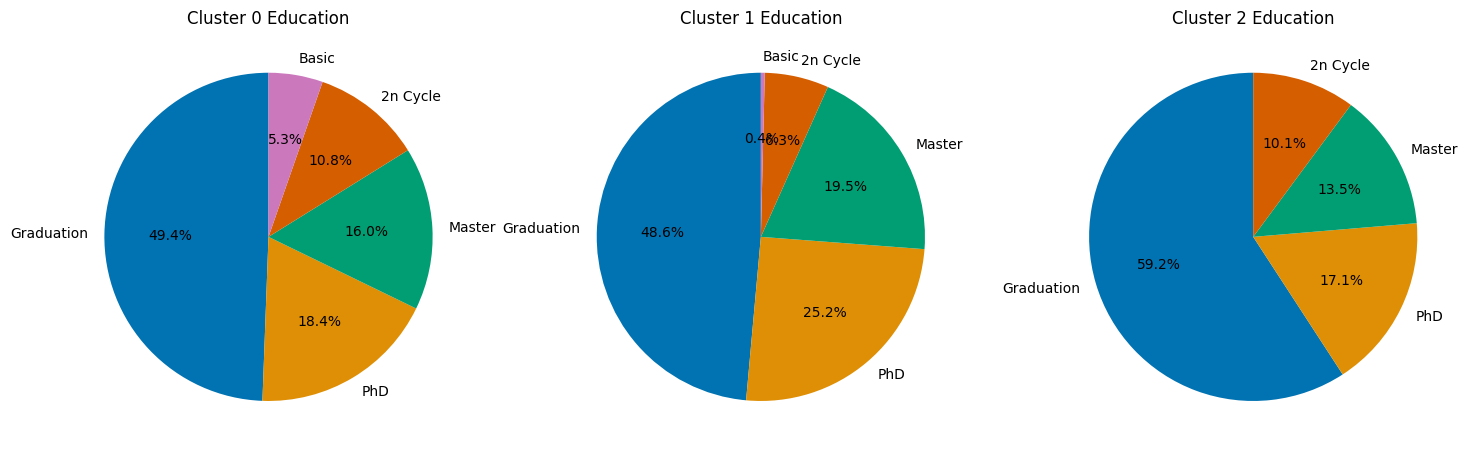

In [56]:
# Plotting pie charts
fig, axs = plt.subplots(1, 3, figsize=(18, 12))

# Cluster 0
axs[0].pie(x=df[df['Cluster_Labels'] == 0]['education'].value_counts(), labels=df[df['Cluster_Labels'] == 0]['education'].value_counts().index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Cluster 0 Education')

# Cluster 1
axs[1].pie(x=df[df['Cluster_Labels'] == 1]['education'].value_counts(), labels=df[df['Cluster_Labels'] == 1]['education'].value_counts().index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Cluster 1 Education')

# Cluster 2
axs[2].pie(x=df[df['Cluster_Labels'] == 2]['education'].value_counts(), labels=df[df['Cluster_Labels'] == 2]['education'].value_counts().index, autopct='%1.1f%%', startangle=90)
axs[2].set_title('Cluster 2 Education')

plt.show()

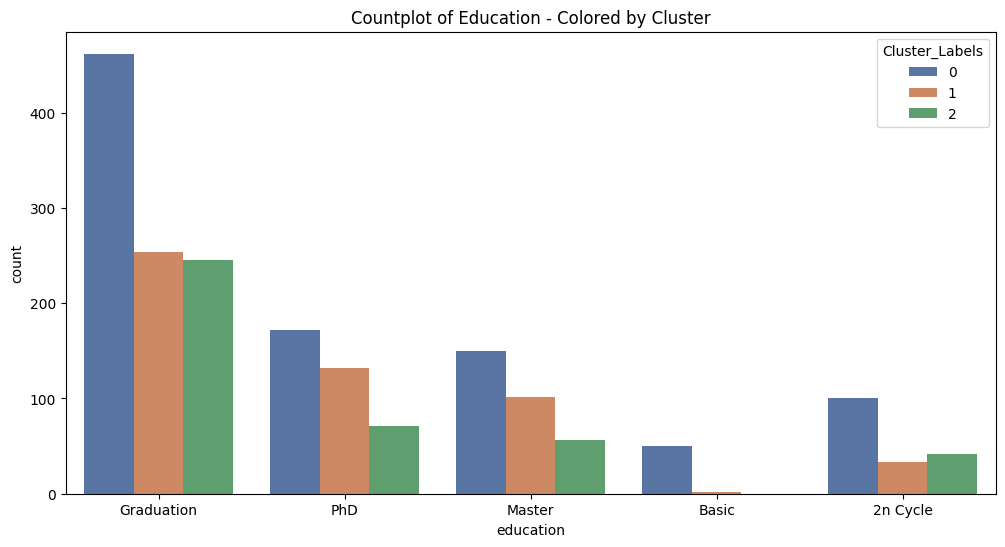

In [44]:
# Calculate cumulative spending for each education
education_clusterlabels = df.groupby('Cluster_Labels')['education'].count()

# Count plot
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(data=df, x='education', hue='Cluster_Labels',palette='deep')
plt.title('Countplot of Education - Colored by Cluster')
plt.show()

# Show the plot
plt.show()

Berdasarkan plot di atas dapat ditarik kesimpulan sebagai berikut:
1. Tingkat edukasi customer terbagi rata untuk setiap cluster.
2. Cluster 0 memiliki customer dengan edukasi basic jauh lebih banyak dibandingkan kelompok lainnya.
3. Mayoritas customer telah lulus pendidikan perguruan tinggi, sehingga dapat dibilang customer merupakan pembeli cerdas.

### 4.3.2 - Kolom `Marital_Status`

In [ ]:
target_marital = df["Marital_Status"].value_counts().reset_index()
target_marital = df["Marital_Status"].value_counts(normalize=True).reset_index()
target_marital

,Marital_Status,proportion
0,Married,0.387414
1,Together,0.252704
2,Single,0.215831
3,Divorced,0.106195
4,Widow,0.034415
5,Alone,0.001475
6,Absurd,0.000983
7,YOLO,0.000983


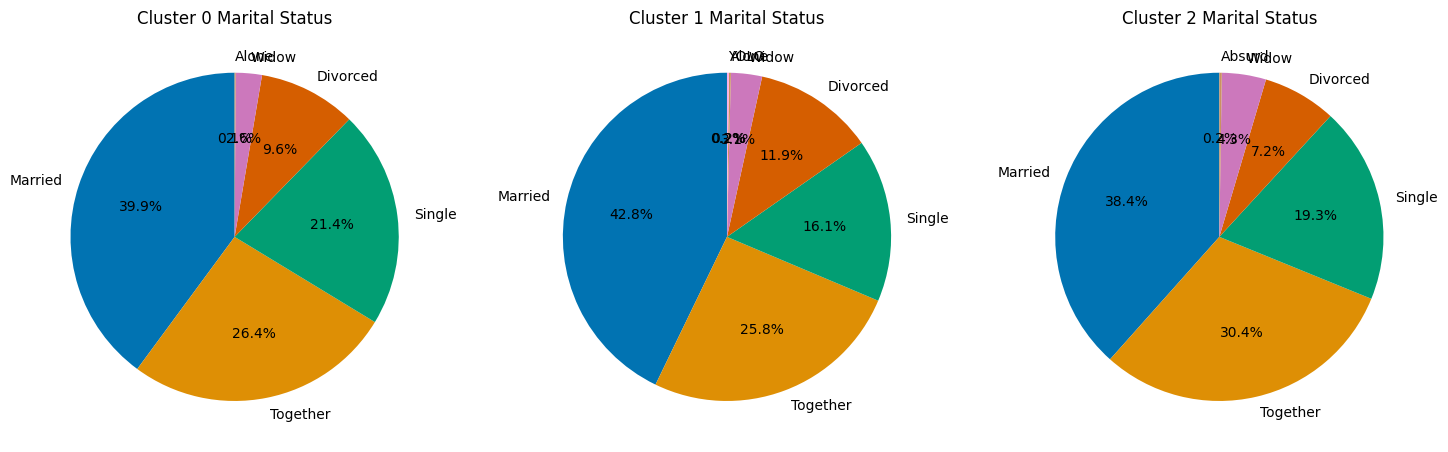

In [58]:
# Plotting pie charts
fig, axs = plt.subplots(1, 3, figsize=(18, 12))

# Cluster 0
axs[0].pie(x=df[df['Cluster_Labels'] == 0]['marital_status'].value_counts(), labels=df[df['Cluster_Labels'] == 0]['marital_status'].value_counts().index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Cluster 0 Marital Status')

# Cluster 1
axs[1].pie(x=df[df['Cluster_Labels'] == 1]['marital_status'].value_counts(), labels=df[df['Cluster_Labels'] == 1]['marital_status'].value_counts().index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Cluster 1 Marital Status')

# Cluster 2
axs[2].pie(x=df[df['Cluster_Labels'] == 2]['marital_status'].value_counts(), labels=df[df['Cluster_Labels'] == 2]['marital_status'].value_counts().index, autopct='%1.1f%%', startangle=90)
axs[2].set_title('Cluster 2 Marital Status')

plt.show()

Berdasarkan plot pie chart distribusi marital status tiap cluster diperoleh kesimpulan sebagai berikut:
1. Komposisi status terbagi rata. Tiap cluster didominasi oleh customer yang sudah married / together, lalu single dan divorce.

### 4.3.3 - Kolom `Kidhome`, dan `Teenhome`

In [69]:
df['kid_teen_home'] = df['kidhome'] + df['teenhome']

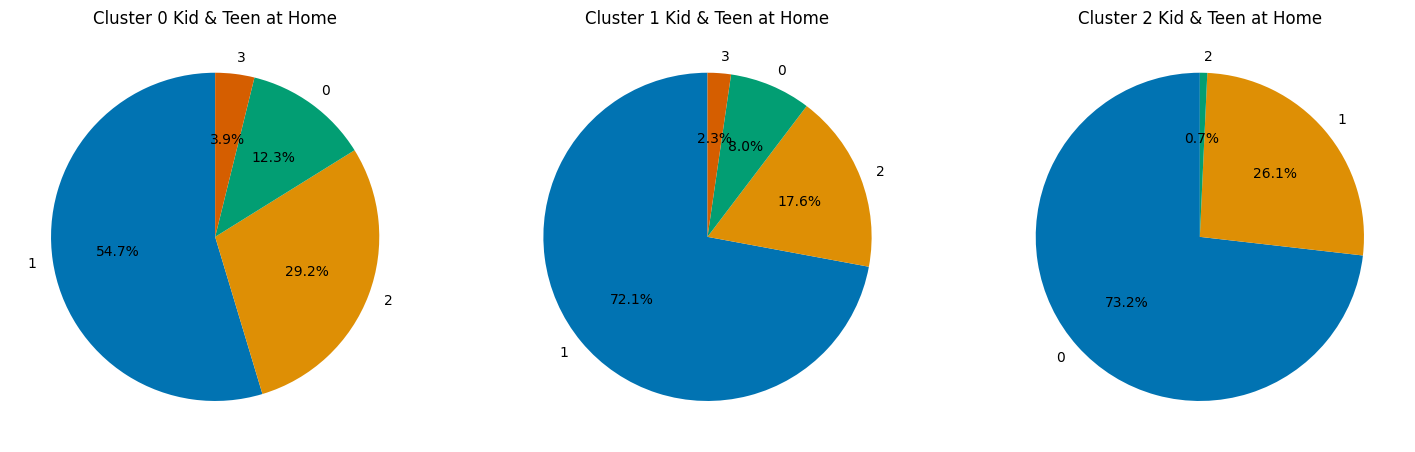

In [70]:
# Plotting pie charts
fig, axs = plt.subplots(1, 3, figsize=(18, 12))

# Cluster 0
axs[0].pie(x=df[df['Cluster_Labels'] == 0]['kid_teen_home'].value_counts(), labels=df[df['Cluster_Labels'] == 0]['kid_teen_home'].value_counts().index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Cluster 0 Kid & Teen at Home')

# Cluster 1
axs[1].pie(x=df[df['Cluster_Labels'] == 1]['kid_teen_home'].value_counts(), labels=df[df['Cluster_Labels'] == 1]['kid_teen_home'].value_counts().index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Cluster 1 Kid & Teen at Home')

# Cluster 2
axs[2].pie(x=df[df['Cluster_Labels'] == 2]['kid_teen_home'].value_counts(), labels=df[df['Cluster_Labels'] == 2]['kid_teen_home'].value_counts().index, autopct='%1.1f%%', startangle=90)
axs[2].set_title('Cluster 2 Kid & Teen at Home')

plt.show()

Berdasarkan plot pie chart distribusi jumlah anak & remaja pada keluarga customer diperoleh kesimpulan sebagai berikut:
1. Cluster 0 dan 1 didominasi oleh customer yang memiliki anak & remaja, dengan mayoritas memiliki 1 atau 2 anak/remaja.
2. Cluster 2 didominasi oleh customer yang tidak memiliki anak / remaja, namun ada sebagian kecil (26%) customer cluster 2 memiliki 1 orang anak/remaja.

### 4.3.4 - Kolom `Complain`

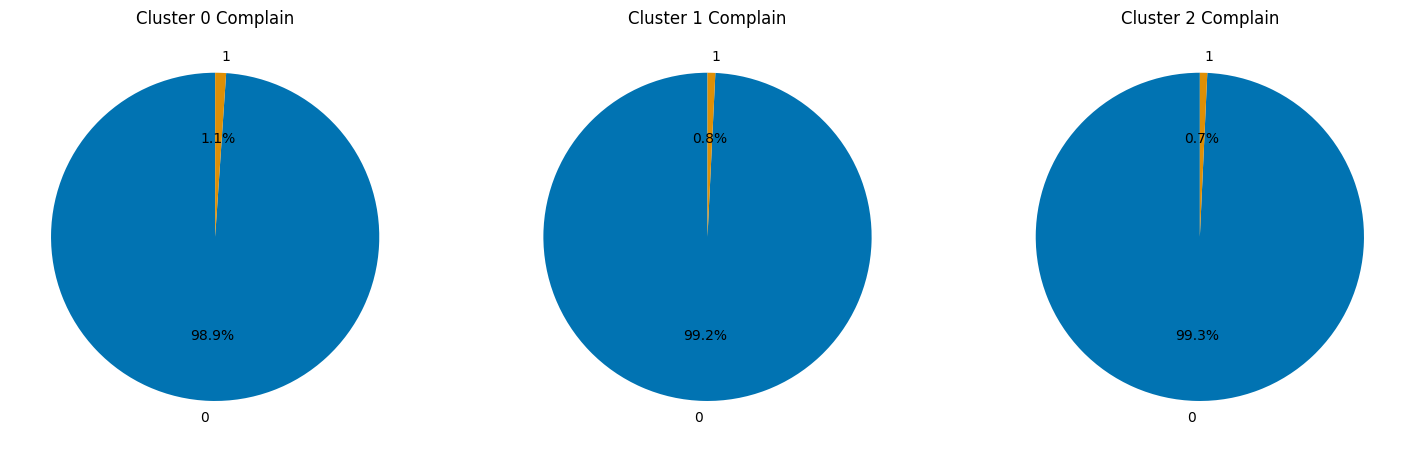

In [71]:
# Plotting pie charts
fig, axs = plt.subplots(1, 3, figsize=(18, 12))

# Cluster 0
axs[0].pie(x=df[df['Cluster_Labels'] == 0]['complain'].value_counts(), labels=df[df['Cluster_Labels'] == 0]['complain'].value_counts().index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Cluster 0 Complain')

# Cluster 1
axs[1].pie(x=df[df['Cluster_Labels'] == 1]['complain'].value_counts(), labels=df[df['Cluster_Labels'] == 1]['complain'].value_counts().index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Cluster 1 Complain')

# Cluster 2
axs[2].pie(x=df[df['Cluster_Labels'] == 2]['complain'].value_counts(), labels=df[df['Cluster_Labels'] == 2]['complain'].value_counts().index, autopct='%1.1f%%', startangle=90)
axs[2].set_title('Cluster 2 Complain')

plt.show()

Kesimpulan:
1. Kinerja toko sudah baik, persentase customer yang komplain hanya sedikit rata-rata 1%

### 4.3.5 - Kolom `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, dan `AcceptedCmp5`

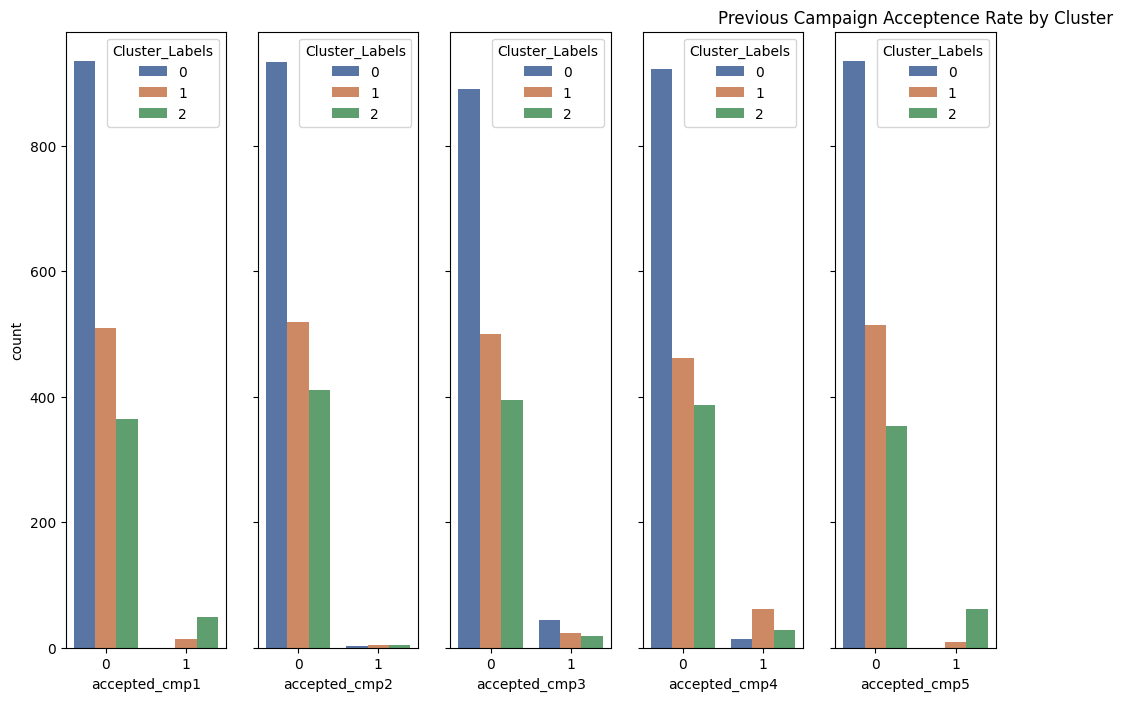

                     Count  Percentage
Campaign      Value                   
accepted_cmp1 0       1809   96.634615
              1         63    3.365385
accepted_cmp2 0       1862   99.465812
              1         10    0.534188
accepted_cmp3 0       1786   95.405983
              1         86    4.594017
accepted_cmp4 0       1770   94.551282
              1        102    5.448718
accepted_cmp5 0       1802   96.260684
              1         70    3.739316


In [77]:
fig, axes = plt.subplots(1, 5, figsize=(12, 8), sharey=True)

sns.countplot(x="accepted_cmp1",hue=df['Cluster_Labels'],data=df, ax=axes[0],palette='deep')
sns.countplot(x="accepted_cmp2",hue=df['Cluster_Labels'], data=df, ax=axes[1],palette='deep')
sns.countplot(x="accepted_cmp3",hue=df['Cluster_Labels'], data=df, ax=axes[2],palette='deep')
sns.countplot(x="accepted_cmp4",hue=df['Cluster_Labels'], data=df, ax=axes[3],palette='deep')
sns.countplot(x="accepted_cmp5",hue=df['Cluster_Labels'], data=df, ax=axes[4],palette='deep')
plt.title('Previous Campaign Acceptence Rate by Cluster')
plt.show()

cmp_columns = ['accepted_cmp1', 'accepted_cmp2', 'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5']

# Initialize an empty DataFrame to store the summary
summary_table = pd.DataFrame()

# Iterate over each AcceptedCmp column
for cmp_column in cmp_columns:
    # Count values
    counts = df[cmp_column].value_counts()
    # Calculate percentages
    percentages = df[cmp_column].value_counts(normalize=True) * 100
    # Combine counts and percentages into a single DataFrame
    cmp_summary = pd.concat([counts, percentages], axis=1)
    # Rename columns
    cmp_summary.columns = ['Count', 'Percentage']
    # Add a level for the AcceptedCmp column
    cmp_summary.index = pd.MultiIndex.from_product([[cmp_column], cmp_summary.index], names=['Campaign', 'Value'])
    # Append to the summary table
    summary_table = pd.concat([summary_table, cmp_summary])

# Display the summary table
print(summary_table)

Kesimpulan:
1. Campaign 3 dan 4 merupakan campaign yang dapat mengajak customer paling besar dengan tingkat kesuksesan 5%
2. Campaign 2 merupakan campaign terburuk karena hanya 0.53% dari customer yang mengikuti.
3. Berdasarkan visualisasi cluster 2 merupakan kelompok yang paling banyak mengikuti campaign, sedangkan cluster 0 merupakan kelompok yang tersedikit dalam mengikuti campaign.
4. Cluster 1 mendominasi pada campaign 4, sehingga untuk menarik customer cluster 1 dapat menggunakan campaign 4 dengan improvisasi.
5. Cluster 0 jarang mengikuti campaign, tetapi pada campaign 3 jumlah customer cluster 0 merupakan yang terbanyak. Sehingga jika ingin menarik customer 0 dapat menggunakan campaign 3 yang telah terbukti menarik customer cluster 0.

# 5 - Kesimpulan